# BibRec: Training Random Forest Model

### RF Features: Country, State, Age, Year-of-Publication, Publisher

In [339]:
from bibrec.server.data_exploration import get_normalized_data, hot_encode_country
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv', users_path='data/BX-Users.csv', ratings_path='data/BX-Book-Ratings.csv')


/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/wt-rf/bibrec/server/data_exploration.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path, sep=";", encoding="latin-1")


With NaN values 34.862889904962536
used mean values 34.89408495226389


/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/wt-rf/bibrec/server/data_exploration.py:37: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [340]:
# limit data volume
df_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
df_ratings = ratings[:10_000]
df_ratings = df_ratings.reset_index()


In [341]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
tmp_users = users.filter(regex="user_id|age|country_|state_", axis=1)
tmp_books = books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df = df_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df = df.merge(tmp_users)
df = df.merge(tmp_books)


In [342]:
df_ratings

,index,user_id,isbn,book_rating,isbn13,age,city,state,country,user_mean,user_count,normalized_rating
0,0,276726,0155061224,5,9780155061224,19.826229,seattle,washington,usa,5.000000,1.0,0.000000
1,1,276729,052165615X,3,9780521656153,16.000000,rijeka,n/a,croatia,4.500000,2.0,-1.500000
2,2,276729,0521795028,6,9780521795029,16.000000,rijeka,n/a,croatia,4.500000,2.0,1.500000
3,3,276744,038550120X,7,9780385501200,51.397942,torrance,california,usa,7.000000,1.0,0.000000
4,4,276747,0060517794,9,9780060517793,25.000000,iowa city,iowa,usa,8.000000,5.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,6975,0440226104,8,9780440226109,39.918707,victoria,british columbia,canada,8.000000,1.0,0.000000
9996,9996,6988,0061099570,8,9780061099571,45.532846,yuma,arizona,usa,8.333333,3.0,-0.333333
9997,9997,6988,0385333919,9,9780385333917,45.532846,yuma,arizona,usa,8.333333,3.0,0.666667
9998,9998,6988,0449001245,8,9780449001240,45.532846,yuma,arizona,usa,8.333333,3.0,-0.333333


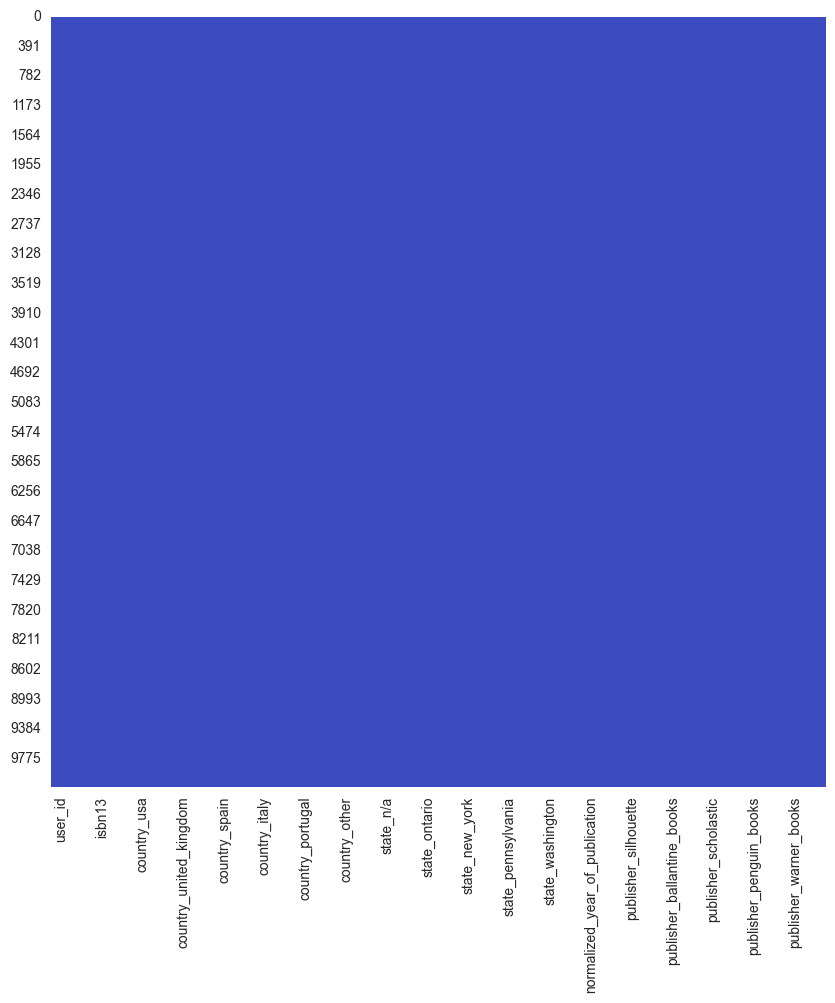

In [343]:
# show the plot
heatmap = sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.gcf().set_size_inches(10, 10)
plt.show()


In [344]:
# Features
X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']


In [345]:
X


,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,country_portugal,...,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,publisher_berkley_publishing_group,publisher_warner_books,publisher_other
0,19.826229,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,16.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,16.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,51.397942,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,25.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10138,29.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10139,45.532846,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10140,45.532846,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10141,45.532846,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [346]:
Y

0         5
1         3
2         6
3         7
4         9
         ..
10138     9
10139     8
10140     9
10141     8
10142    10
Name: book_rating, Length: 10143, dtype: int64

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [348]:
from os.path import exists
import pickle

# Load the model from the file
file="random_forest_classifier5.pkl"

if exists(file):
    print("Loading file:", file)
    with open(file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model")
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1)

Loading file: random_forest_classifier5.pkl


In [349]:
rfc.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1)

In [350]:
import pickle

# Save the model to a file
with open("rf5.pkl", "wb") as file:
    pickle.dump(rfc, file)

In [351]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        14
           3       0.06      0.02      0.03        53
           4       0.06      0.03      0.04        63
           5       0.18      0.12      0.15       299
           6       0.15      0.09      0.11       287
           7       0.24      0.21      0.22       552
           8       0.24      0.33      0.28       647
           9       0.17      0.16      0.17       476
          10       0.33      0.40      0.36       637

    accuracy                           0.24      3043
   macro avg       0.14      0.14      0.14      3043
weighted avg       0.22      0.24      0.23      3043

23.85803483404535


Confusion matrix, without normalization
[[  0   0   0   0   0   0   4   4   5   2]
 [  0   0   1   0   0   1   5   5   0   2]
 [  0   1   1   2   6   2   7  17   7  10]
 [  0   0   1   2   5   4  10  17   7  17]
 [  1   2   3   8  37  21  51  72  36  68]
 [  0   0   1   4  30  26  52  85  39  50]
 [  1   1   4   8  37  31 114 167  85 104]
 [  2   2   2   6  30  43 110 212  97 143]
 [  0   0   2   0  32  23  62 154  78 125]
 [  2   1   3   3  34  24  67 151  96 256]]
Normalized confusion matrix
[[0.   0.   0.   0.   0.   0.   0.27 0.27 0.33 0.13]
 [0.   0.   0.07 0.   0.   0.07 0.36 0.36 0.   0.14]
 [0.   0.02 0.02 0.04 0.11 0.04 0.13 0.32 0.13 0.19]
 [0.   0.   0.02 0.03 0.08 0.06 0.16 0.27 0.11 0.27]
 [0.   0.01 0.01 0.03 0.12 0.07 0.17 0.24 0.12 0.23]
 [0.   0.   0.   0.01 0.1  0.09 0.18 0.3  0.14 0.17]
 [0.   0.   0.01 0.01 0.07 0.06 0.21 0.3  0.15 0.19]
 [0.   0.   0.   0.01 0.05 0.07 0.17 0.33 0.15 0.22]
 [0.   0.   0.   0.   0.07 0.05 0.13 0.32 0.16 0.26]
 [0.   0.   0.   0.   0.

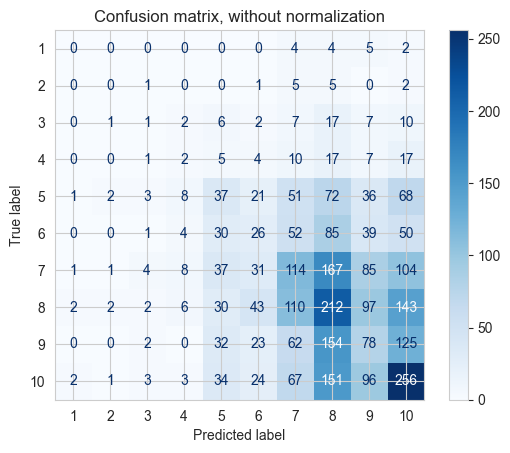

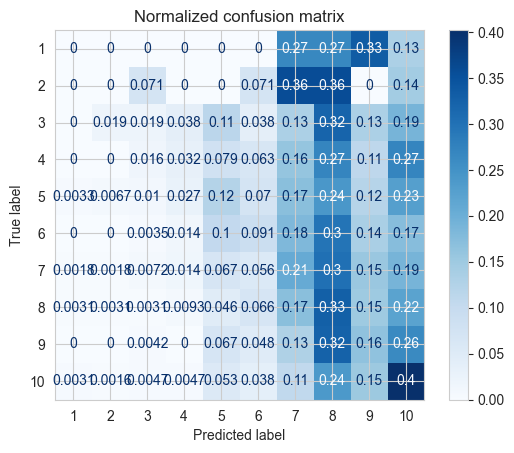

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [353]:
rfc.score(X_train, y_train)

0.5569014084507042

In [354]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances',ascending=False)
feature_importance

,Feature_names,Importances
0,age,0.808980
23,normalized_year_of_publication,0.190378
34,publisher_other,0.000291
29,publisher_scholastic,0.000192
24,publisher_harlequin,0.000159
3,country_united_kingdom,0.000000
4,country_germany,0.000000
33,publisher_warner_books,0.000000
32,publisher_berkley_publishing_group,0.000000
31,publisher_penguin_books,0.000000


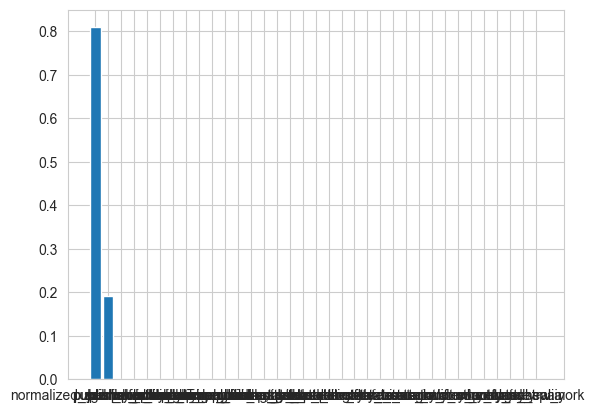

In [355]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [356]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex = True)]
country_importance

,Feature_names,Importances
3,country_united_kingdom,0.0
4,country_germany,0.0
2,country_canada,0.0
1,country_usa,0.0
11,country_other,0.0
10,country_new_zealand,0.0
9,country_portugal,0.0
8,country_france,0.0
7,country_italy,0.0
6,country_australia,0.0


In [357]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex = True)]
state_importance

,Feature_names,Importances
22,state_other,0.0
21,state_washington,0.0
20,state_illinois,0.0
19,state_pennsylvania,0.0
18,state_florida,0.0
16,state_texas,0.0
15,state_ontario,0.0
14,state_england,0.0
13,state_n/a,0.0
12,state_california,0.0


In [358]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex = True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())

age: 0    0.80898
Name: Importances, dtype: float64
country_importance: 0.0
state_importance: 0.0
